# SVM Kernel Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(-5,5,100)
y=np.sqrt(10**2-x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [3]:
x1=np.linspace(-5,5,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

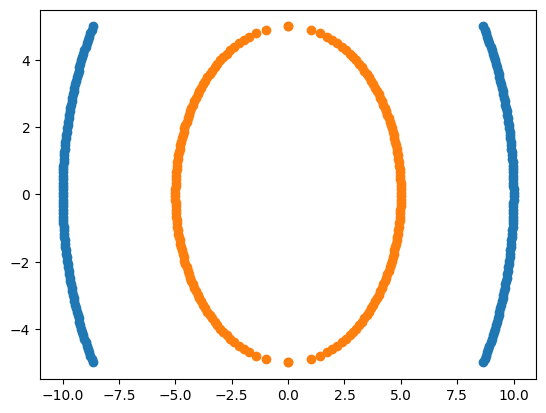

In [4]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [5]:
import pandas as pd

In [6]:
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1

In [7]:
df = pd.concat([df1, df2], axis=0)

In [8]:
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [9]:
df.tail()

,X1,X2,Y
195,-1.969049,-4.59596,1
196,-1.714198,-4.69697,1
197,-1.406908,-4.79798,1
198,-0.999949,-4.89899,1
199,-0.000000,-5.00000,1


### Polynomial Kernel 
- K(x,y)= (x^Ty+c)^d

In [10]:
df['X1_Square']=df['X1']**2

In [11]:
df['X2_Square']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [12]:
## Independent and Dependent Features
X=df.drop(columns=['Y'])
y=df['Y']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [15]:
import plotly.express as px

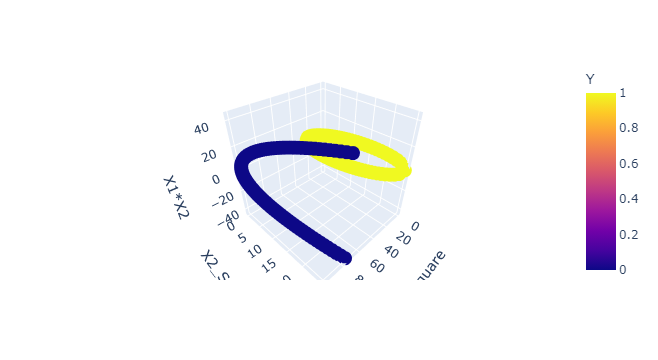

In [19]:
fig=px.scatter_3d(df,x='X1_Square',y='X2_Square',z='X1*X2',color='Y')
fig.show()
plt.show()

In [20]:
from sklearn.svm import SVC

In [22]:
classifier=SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [24]:
y_pred=classifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
# Accuracy
print(accuracy_score(y_test,y_pred))

1.0


### Radial Basis Function Kernal (RBF)

In [28]:
#Independent and Dependent Features
Xr=df[['X1','X2']]
yr=df['Y']

In [29]:
Xr

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
195,-1.969049,-4.59596
196,-1.714198,-4.69697
197,-1.406908,-4.79798
198,-0.999949,-4.89899


In [30]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(Xr,yr,test_size=0.25,random_state=0)

In [31]:
classifier_r=SVC(kernel='rbf')
classifier_r.fit(Xr_train,yr_train)
y_pred_r=classifier_r.predict(Xr_test)

In [32]:
# Accuracy
print(accuracy_score(yr_test,y_pred_r))

1.0


### Sigmoid Kernel

In [33]:
classifier_s=SVC(kernel='sigmoid')
classifier_s.fit(Xr_train,yr_train)
y_pred_s=classifier_s.predict(Xr_test)

In [34]:
# Accuracy
print(accuracy_score(yr_test,y_pred_s))

0.51
